In [0]:
###25/09/2019
import torch

x = torch.tensor([5,3])
y = torch.tensor([2,1])

print(x*y)

tensor([10,  3])


In [0]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [0]:
x.shape

torch.Size([2, 5])

In [0]:
y = torch.rand([2,5])
y

tensor([[0.5671, 0.5523, 0.4898, 0.3273, 0.1452],
        [0.6588, 0.8945, 0.5893, 0.1630, 0.4934]])

In [0]:
y = y.view([1,10])
y

tensor([[0.5671, 0.5523, 0.4898, 0.3273, 0.1452, 0.6588, 0.8945, 0.5893, 0.1630,
         0.4934]])

In [0]:
##26/09/2019
import torchvision
from torchvision import transforms, datasets

In [0]:
train = datasets.MNIST("", train=True,
                      download=True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False,
                      download=True, transform = transforms.Compose([transforms.ToTensor()]))

0it [00:00, ?it/s]

100%|█████████▉| 9871360/9912422 [00:13<00:00, 456096.10it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]
  0%|          | 0/28881 [00:00<?, ?it/s]


32768it [00:00, 124373.07it/s]           
0it [00:00, ?it/s]
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz



 97%|█████████▋| 1597440/1648877 [00:02<00:00, 930819.72it/s]
1654784it [00:02, 586335.24it/s]                             
0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz



  0%|          | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 46572.80it/s]            

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [0]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [0]:
x, y = data[0][0], data[1][0]
print(y)

tensor(6)


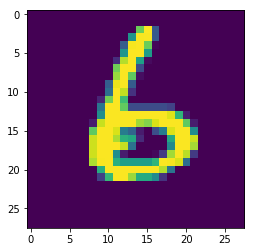

In [0]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

In [0]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [0]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)]+=1
    total +=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [0]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [0]:
##30/09/2019
import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Net(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 64) ##28*28 = 784, we need 3 64 neurons hidden layer hence 64
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
    
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    
    return F.log_softmax(x,dim=1)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [0]:
output = net(X)
output

tensor([[-2.1694, -2.2826, -2.2029, -2.3991, -2.4240, -2.3114, -2.3232, -2.4100,
         -2.3170, -2.2217]], grad_fn=<LogSoftmaxBackward>)